In [2]:
import suite2p
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from natsort import natsorted
from multiprocessing import Pool



In [13]:
opsSetfile=r'E:\LuRecordingSuit2pPro\ops3Planes.npy';
ops0 = np.load(opsSetfile,allow_pickle=True).item()
ops0['input_format']='binary';
#ops0['save_path0']='C:/Users/zhangl33/Projects/Project4-SLMonline/LuSLMOnlineTest/02082024/'
ops0['save_path0']=r'E:\LuRecording\03082024_MouseMei03_VGlutAi203SLM\\'
ops0['Lx']=512  ##Width of a image
ops0['Ly']=512  ##Height of a image
ops0['xrange']=[0,512]
ops0['yrange']=[0,512]
ops0['nplanes']=3
ops0['nchannels']=1
ops0['tau']=0.9
ops0['fs']=6.9;
nplanes=ops0['nplanes'];
binFile = glob.glob(ops0['save_path0'] + '/*TSeries-03082024-1105-001.bin')


#binFile = glob.glob(ops0['save_path0'] + '/*027.bin')
print(binFile[0])

rawBin = suite2p.io.BinaryFile(Ly=ops0['Ly'],Lx=ops0['Lx'], filename=binFile[0])
nFrame = rawBin.shape[0] // nplanes
print(rawBin.shape)
print(nFrame)
TotalFrameNeed=rawBin.shape[0]
#del statExample

E:\LuRecording\03082024_MouseMei03_VGlutAi203SLM\TSeries-03082024-1105-001.bin
(21603, 512, 512)
7201


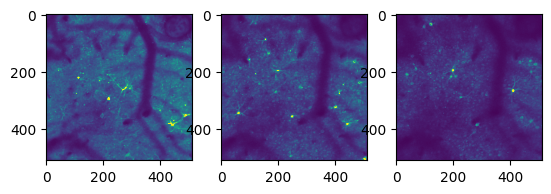

In [16]:
fig, ax = plt.subplots(1,3)
for iplane in range(ops0['nplanes']):
    plane_data = rawBin[range(0+iplane,TotalFrameNeed,nplanes),:,::-1]
    ax[iplane].imshow(np.mean(plane_data[range(1,1000),:,:],axis=0),vmin=1,vmax=1000)